# Imports

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
from datetime import datetime

# Loading and Preprocessing Data

Data loaded successfully from ../data/raw/BrentOilPrices.csv.
Missing values filled successfully.
Duplicate rows removed.


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_9592/3176343040.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


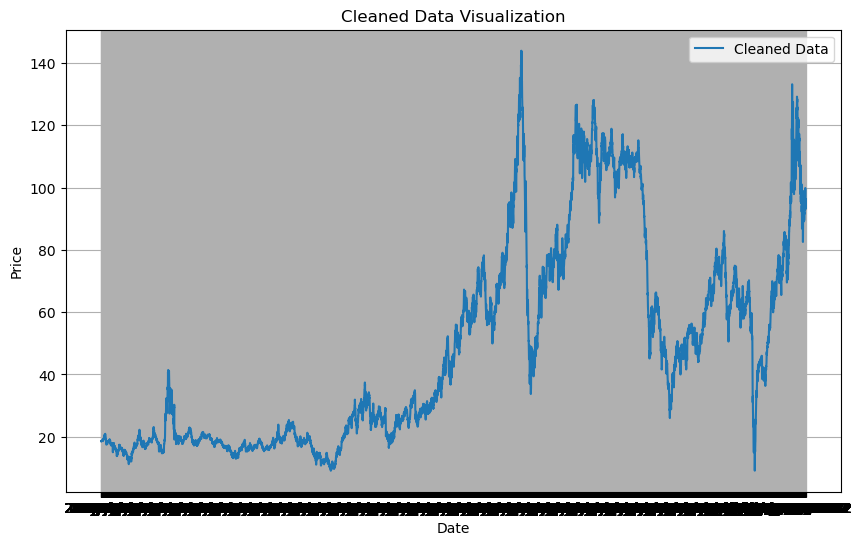

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to load the data
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully from {file_path}.")
        return df
    except Exception as e:
        print(f"Error loading data: {e}")

# Function to clean the data
def clean_data(df):
    try:
        # Handling missing values by forward filling
        df.fillna(method='ffill', inplace=True)
        print("Missing values filled successfully.")
        
        # Removing duplicates
        df.drop_duplicates(inplace=True)
        print("Duplicate rows removed.")
        
        return df
    except Exception as e:
        print(f"Error cleaning data: {e}")

# Load and clean data
file_path = '../data/raw/BrentOilPrices.csv'
df = load_data(file_path)
df_clean = clean_data(df)

# Visualize the cleaned data (basic plot)
plt.figure(figsize=(10, 6))
plt.plot(df_clean['Date'], df_clean['Price'], label='Cleaned Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cleaned Data Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Statistical Modeling (ARIMA)

/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_9592/4161980603.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


ARIMA Model Fitted: AIC = 29093.899239444276


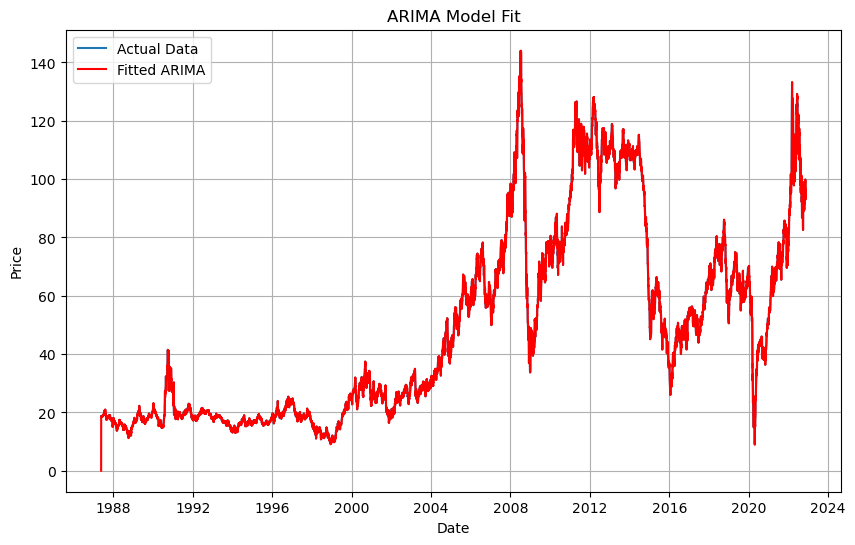

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def fit_arima(df):
    try:
        # Ensure 'Date' is in datetime format
        df['Date'] = pd.to_datetime(df['Date'])
        
        # ARIMA model (Example: (p, d, q) = (1, 1, 1))
        model = ARIMA(df['Price'], order=(1, 1, 1))
        model_fit = model.fit()
        print(f"ARIMA Model Fitted: AIC = {model_fit.aic}")
        return model_fit
    except Exception as e:
        print(f"Error fitting ARIMA model: {e}")

# Fit the ARIMA model
arima_model = fit_arima(df_clean)

# Plot the fitted ARIMA model results
plt.figure(figsize=(10, 6))
plt.plot(df_clean['Date'], df_clean['Price'], label='Actual Data')
plt.plot(df_clean['Date'], arima_model.fittedvalues, label='Fitted ARIMA', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Model Fit')
plt.legend()
plt.grid(True)
plt.show()

# Feature Engineering

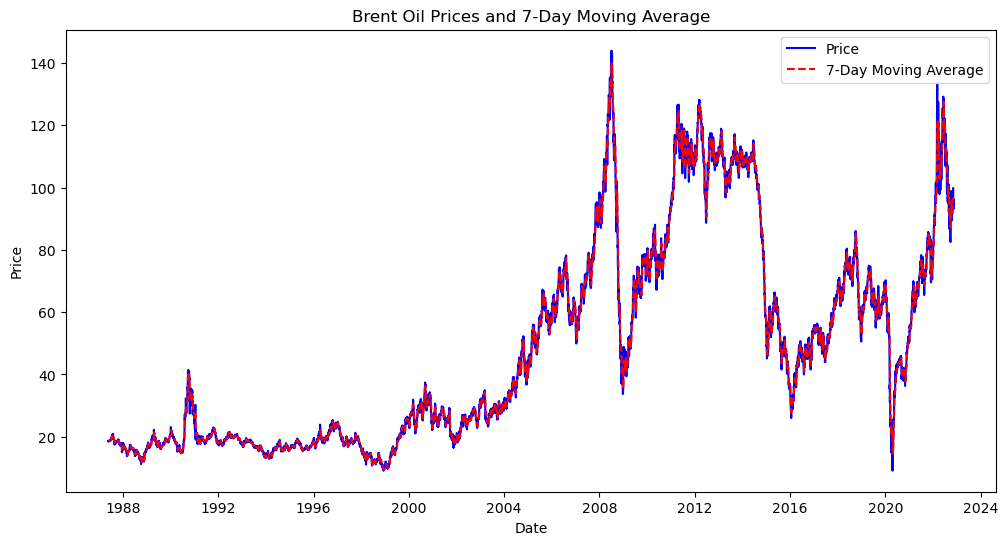


First Few Rows After Feature Engineering:
            Price  7_day_MA  Price_pct_change
Date                                         
1987-05-20  18.63       NaN               NaN
1987-05-21  18.45       NaN         -0.966184
1987-05-22  18.55       NaN          0.542005
1987-05-25  18.60       NaN          0.269542
1987-05-26  18.63       NaN          0.161290


In [5]:
# Feature Engineering: Add moving average and percentage change
def feature_engineering(df):
    # 7-day Moving Average
    df['7_day_MA'] = df['Price'].rolling(window=7).mean()
    
    # Daily Percentage Change
    df['Price_pct_change'] = df['Price'].pct_change() * 100
    
    return df

# Apply feature engineering
df = feature_engineering(df)

# Plot the features
plt.figure(figsize=(12,6))
plt.plot(df['Price'], label="Price", color='blue')
plt.plot(df['7_day_MA'], label="7-Day Moving Average", color='red', linestyle='--')
plt.title("Brent Oil Prices and 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Display the first few rows with the new features
print("\nFirst Few Rows After Feature Engineering:")
print(df.head())

#  Model Training (ARIMA and GARCH)

/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zelalemtegene/envs/shared_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will 

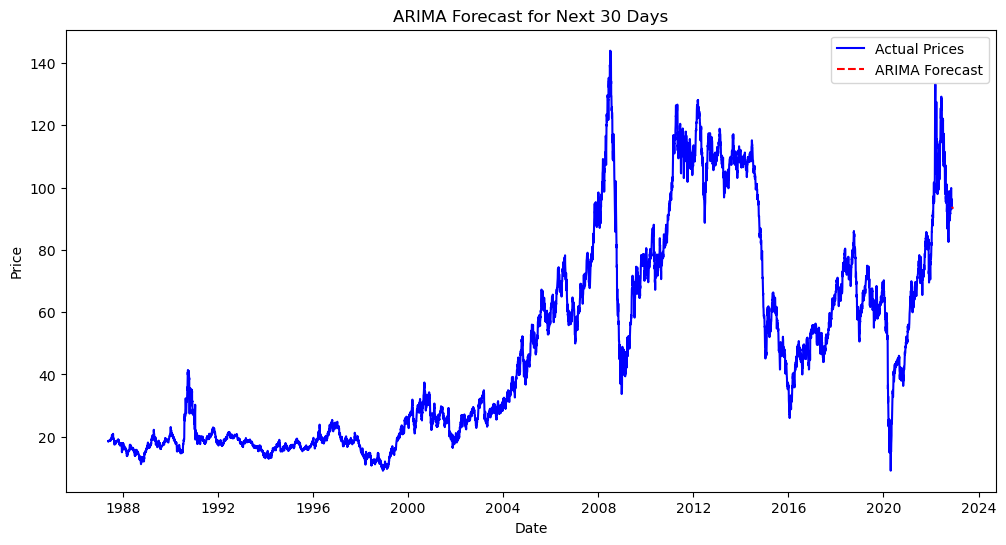


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Sun, 23 Feb 2025   AIC                          29093.899
Time:                        16:59:33   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.0

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model: Train and Forecast
def train_arima_model(df):
    # Train the ARIMA model
    arima_model = ARIMA(df['Price'], order=(1,1,1))  # Adjust the order (p, d, q) as needed
    arima_result = arima_model.fit()
    
    # Forecast the next 30 days
    forecast = arima_result.forecast(steps=30)
    
    return arima_result, forecast

# Train ARIMA model and get forecast
arima_result, forecast = train_arima_model(df)

# Plot the forecasted data
plt.figure(figsize=(12,6))
plt.plot(df['Price'], label="Actual Prices", color='blue')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], forecast, label="ARIMA Forecast", color='red', linestyle='--')
plt.title("ARIMA Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Display ARIMA model summary
print("\nARIMA Model Summary:")
print(arima_result.summary())

#  Model Evaluation and Conclusion

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(actual, predicted):
    try:
        mae = mean_absolute_error(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        print(f"Model Evaluation: MAE = {mae}, RMSE = {rmse}")
        return mae, rmse
    except Exception as e:
        print(f"Error evaluating model: {e}")

# Evaluate ARIMA model performance
arima_predictions = arima_model.fittedvalues
evaluate_model(df_clean['Price'], arima_predictions)

Model Evaluation: MAE = 0.7516215715795118, RMSE = 1.2313036649390183


(0.7516215715795118, 1.2313036649390183)